# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Big Data Real-Time Analytics com Python e Spark</font>

## <font color='blue'>Estudo de Caso 3</font>

## <font color='blue'>Análise Exploratória e Data Wrangling Para E-Commerce Analytics</font>

Obs: Estaremos trabalhando em um grande projeto de Ciência de Dados distribuído em 3 capítulos:

- **Análise Exploratória de Dados**
    - **EDA Parte 1**
    - **EDA Parte 2**
- Engenharia de Atributos
- Pré-Processamento de Dados

![title](imagens/EstudoCaso3.png)

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
#!pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Parâmetros de configuração dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

pandas    : 1.4.4
seaborn   : 0.11.2
matplotlib: 3.5.2
numpy     : 1.21.5



## Carregando o Dataset

In [6]:
# Carrega os dados
df = pd.read_csv('dados/dataset.csv')

In [7]:
df.shape

(11000, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [9]:
df.head(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [10]:
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
9813,9814,B,Navio,5,1,229,4,media,M,1,4584,1
9020,9021,A,Caminhao,3,2,124,5,media,M,10,5348,0
260,261,A,Caminhao,2,5,159,3,baixa,F,49,1621,1
5482,5483,C,Aviao,5,4,217,2,media,M,4,4380,1
4061,4062,F,Navio,3,5,154,2,media,M,6,4744,0


In [11]:
df.tail(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
10995,10996,B,Navio,4,1,232,5,media,F,6,1247,0
10996,10997,C,Navio,5,4,242,5,baixa,F,4,1155,0
10997,10998,F,Navio,5,2,223,6,media,M,2,1210,0
10998,10999,D,Navio,2,5,155,5,baixa,F,6,1639,0
10999,11000,C,Navio,4,2,255,5,baixa,F,6,1739,0


## EDA - Parte 1

### Separação das Variáveis Categóricas e Numéricas

In [12]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [13]:
df.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

In [14]:
# Lista de colunas categóricas
cats = ['corredor_armazem',
        'modo_envio', 
        'prioridade_produto', 
        'genero']

In [15]:
# Lista de colunas numéricas
nums = ['numero_chamadas_cliente', 
        'avaliacao_cliente', 
        'custo_produto', 
        'compras_anteriores', 
        'desconto', 
        'peso_gramas']

In [16]:
df['entregue_no_prazo'].value_counts()

1    6563
0    4437
Name: entregue_no_prazo, dtype: int64

In [17]:
target = ['entregue_no_prazo']

### Explorando as Variáveis Numéricas

In [18]:
# Resumo das variáveis numéricas
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


Algumas observações:

1. As colunas `numero_chamadas_cliente`, `avaliacao_cliente` e `custo_produto` parecem ter uma distribuição bastante simétrica (média e mediana não são muito diferentes).

2. As colunas `compras_anteriores` e `desconto` parecem estar inclinadas para a direita (Média maior do que a Mediana).

3. A coluna `peso_gramas` parece estar mais inclinada para a esquerda (Média menor do que a Mediana).

<AxesSubplot:>

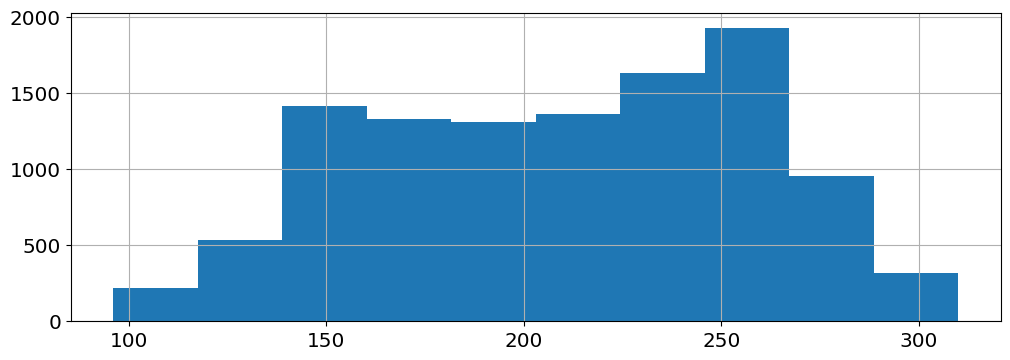

In [19]:
df['custo_produto'].hist()

<AxesSubplot:>

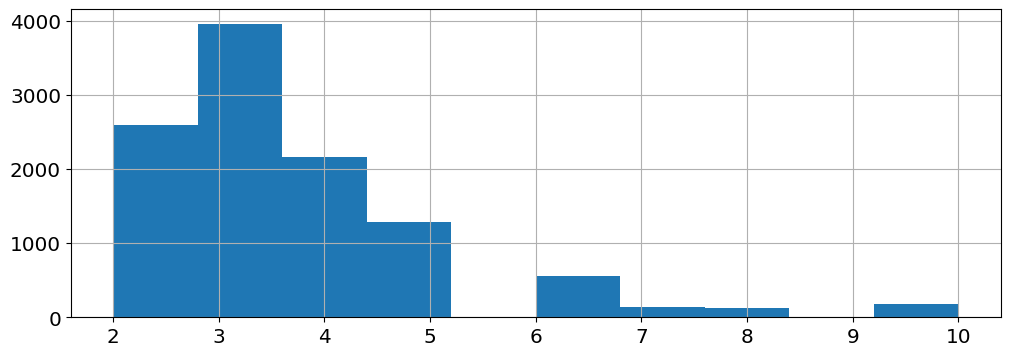

In [20]:
df['compras_anteriores'].hist()

### Explorando as Variáveis Categóricas

In [21]:
# Resumo das variáveis categóricas
df[cats].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


Algumas observações:

* Para a variável corredor_armazem **F** é a classe dominante.
* Para a variável de modo de envio **Navio** é a classe dominante.
* Para a variável de prioridade do produto **baixa** é a classe dominante.
* Para a variável de gênero, **F(Feminino)** é a classe dominante.
* Todos os valores únicos para cada categoria estão em torno de **2-5 valores únicos**

In [22]:
# Listando o total por categoria de cada variável categórica
for col in cats:
    print(f'''Total de Registros Por Categoria da Variável {col}:''')
    print(df[col].value_counts())
    print()

Total de Registros Por Categoria da Variável corredor_armazem:
F    3666
D    1834
C    1834
A    1833
B    1833
Name: corredor_armazem, dtype: int64

Total de Registros Por Categoria da Variável modo_envio:
Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64

Total de Registros Por Categoria da Variável prioridade_produto:
baixa    5298
media    4754
alta      948
Name: prioridade_produto, dtype: int64

Total de Registros Por Categoria da Variável genero:
F    5546
M    5454
Name: genero, dtype: int64



### Análise Univariada - Box Plots

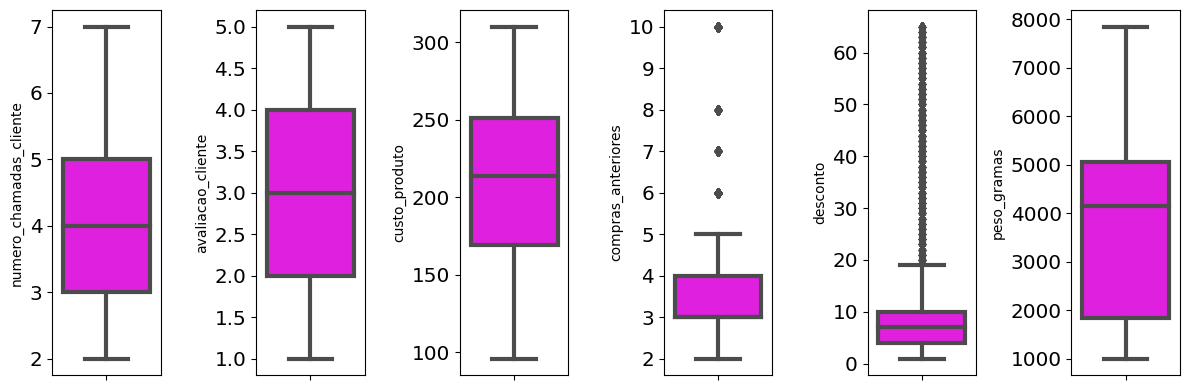

In [58]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.boxplot(y = df[nums[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

### Análise Univariada - Dist Plots

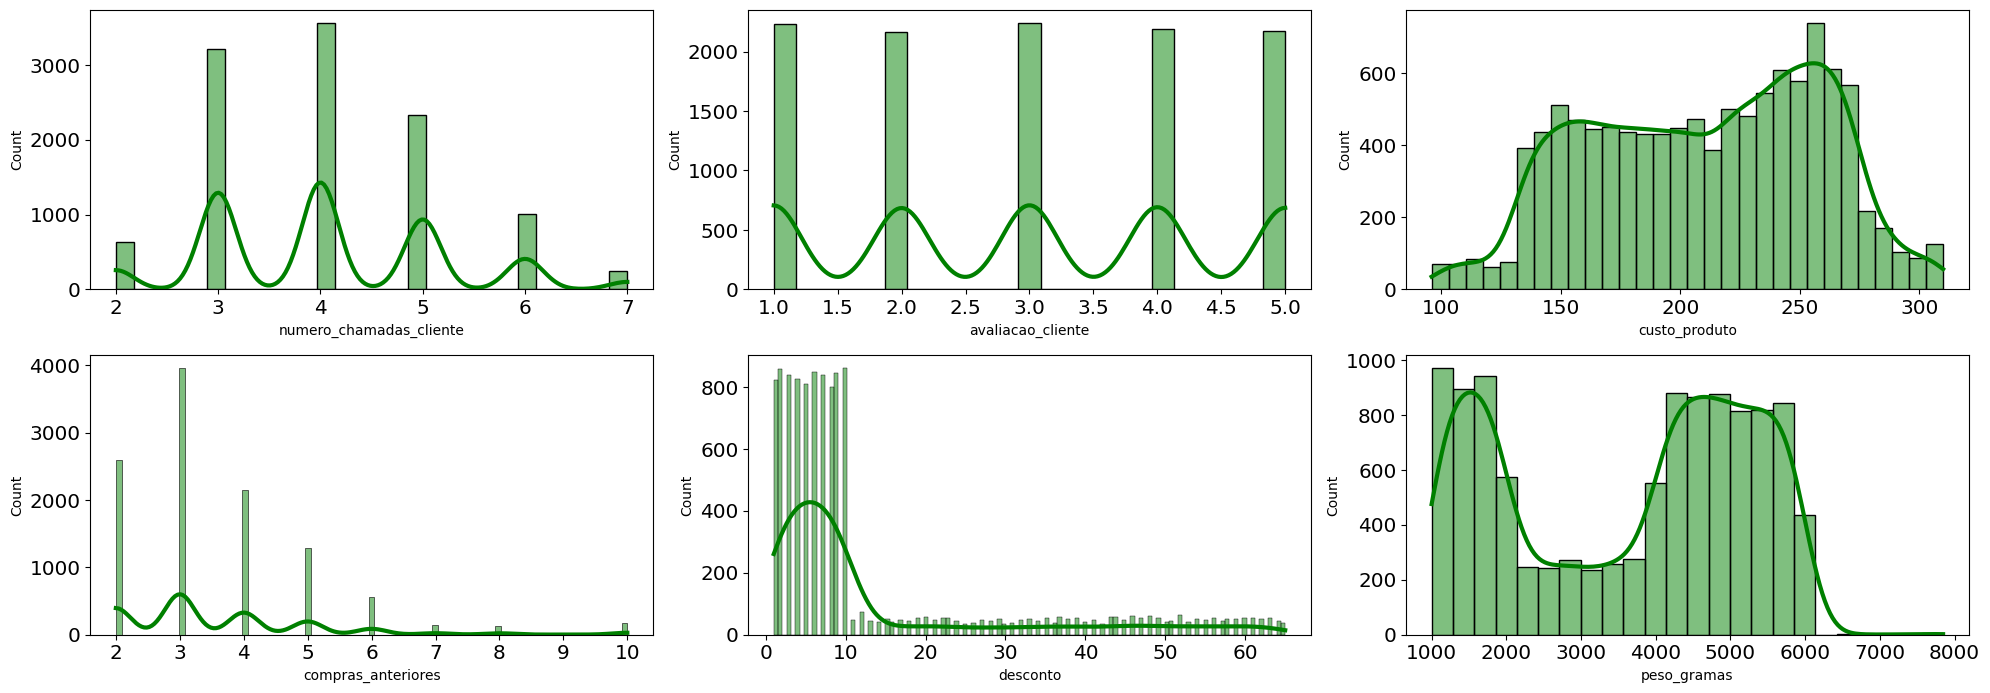

In [55]:
plt.figure(figsize = (20, 10))
for i in range(0, len(nums)):
    plt.subplot(3, 3, i+1)
    sns.histplot(x = df[nums[i]], kde = True, color = 'green')
    plt.xlabel(nums[i])
    plt.tight_layout()

### Análise Univariada - Violin Plots

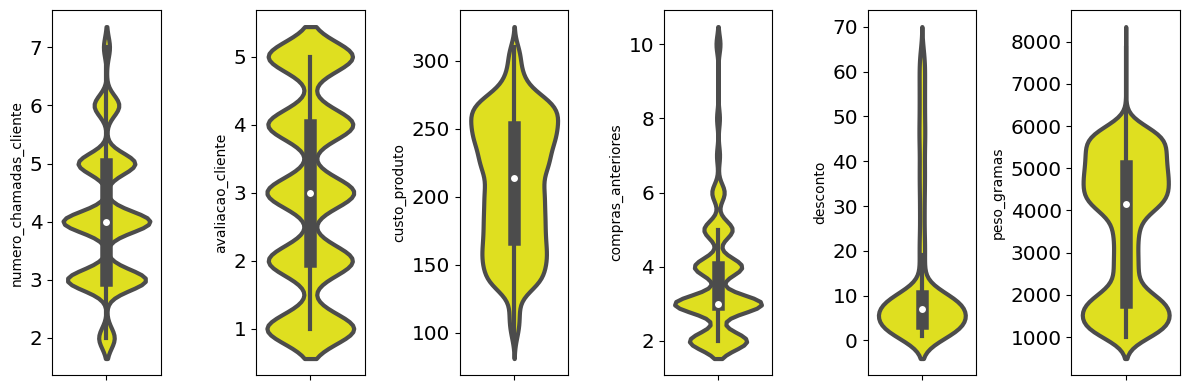

In [56]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y = df[nums[i]], color = 'yellow', orient = 'v')
    plt.tight_layout()

A partir dos gráficos pode-se observar que:

* A coluna `custo_produto` parece estar próxima de uma distribuição normal.

* Como suspeitamo, as colunas `compras_anteriores` e `desconto` estão ligeiramente *inclinadas*, o que significa que existe a possibilidade de precisarmos fazer algo com essas colunas mais tarde.

* Para a coluna `peso_gramas` há incerteza de distribuição porque é em forma de u.

* As colunas `numero_chamadas_cliente` e `avaliacao_cliente` estão distribuídas uniformemente.

### Análise Univariada - Count Plot (Categorical)

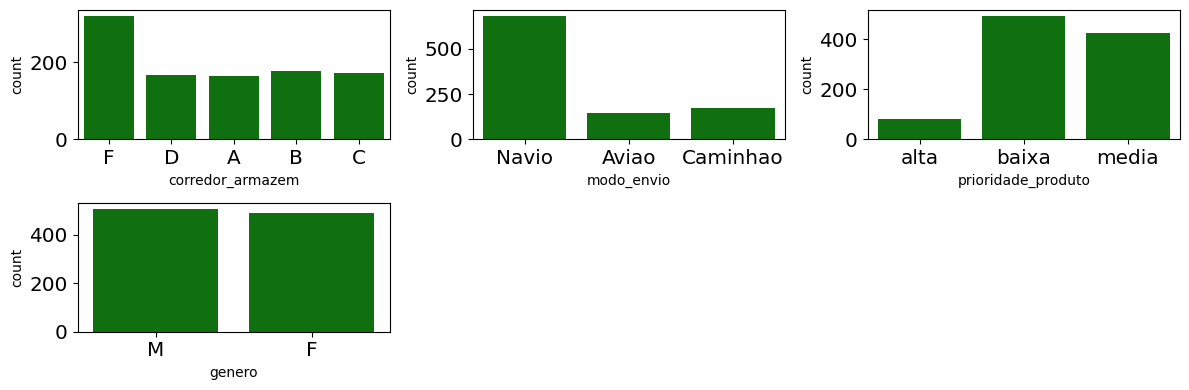

In [61]:
df_sample = df.sample(1000, random_state = 42)
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats[i]], color = 'green', orient = 'v')
    plt.tight_layout()

<AxesSubplot:xlabel='entregue_no_prazo', ylabel='count'>

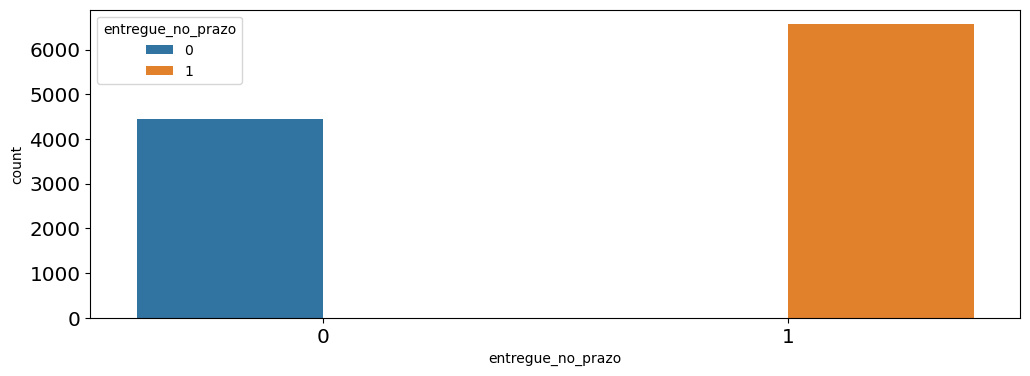

In [62]:
# Count Plot da variável target
sns.countplot(data = df, x = df['entregue_no_prazo'], hue = 'entregue_no_prazo')

A partir dos gráficos pode-se observar que:

* A maioria dos produtos enviados vieram do corredor F.

* Modo de envio através de Navio é o mais comum.

* Há poucos produtos com prioridade alta de entrega.

* A proporção de clientes do sexo Masculino e Feminino é praticamente a mesma.

* A coluna `entregue_no_prazo` é binária, então não há necessidade de prestar muita atenção à forma da distribuição.


### Análise Bivariada - Mapa de Correlação

In [63]:
df[nums].corr()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
numero_chamadas_cliente,1.000000,0.012212,0.323165,0.180760,-0.130747,-0.276593
avaliacao_cliente,0.012212,1.000000,0.009210,0.013119,-0.003095,-0.001823
custo_produto,0.323165,0.009210,1.000000,0.123746,-0.138343,-0.132689
compras_anteriores,0.180760,0.013119,0.123746,1.000000,-0.082804,-0.168295
desconto,-0.130747,-0.003095,-0.138343,-0.082804,1.000000,-0.375992
peso_gramas,-0.276593,-0.001823,-0.132689,-0.168295,-0.375992,1.000000


In [64]:
corr_df = df[nums].corr()

In [65]:
corr_df

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
numero_chamadas_cliente,1.000000,0.012212,0.323165,0.180760,-0.130747,-0.276593
avaliacao_cliente,0.012212,1.000000,0.009210,0.013119,-0.003095,-0.001823
custo_produto,0.323165,0.009210,1.000000,0.123746,-0.138343,-0.132689
compras_anteriores,0.180760,0.013119,0.123746,1.000000,-0.082804,-0.168295
desconto,-0.130747,-0.003095,-0.138343,-0.082804,1.000000,-0.375992
peso_gramas,-0.276593,-0.001823,-0.132689,-0.168295,-0.375992,1.000000


<AxesSubplot:>

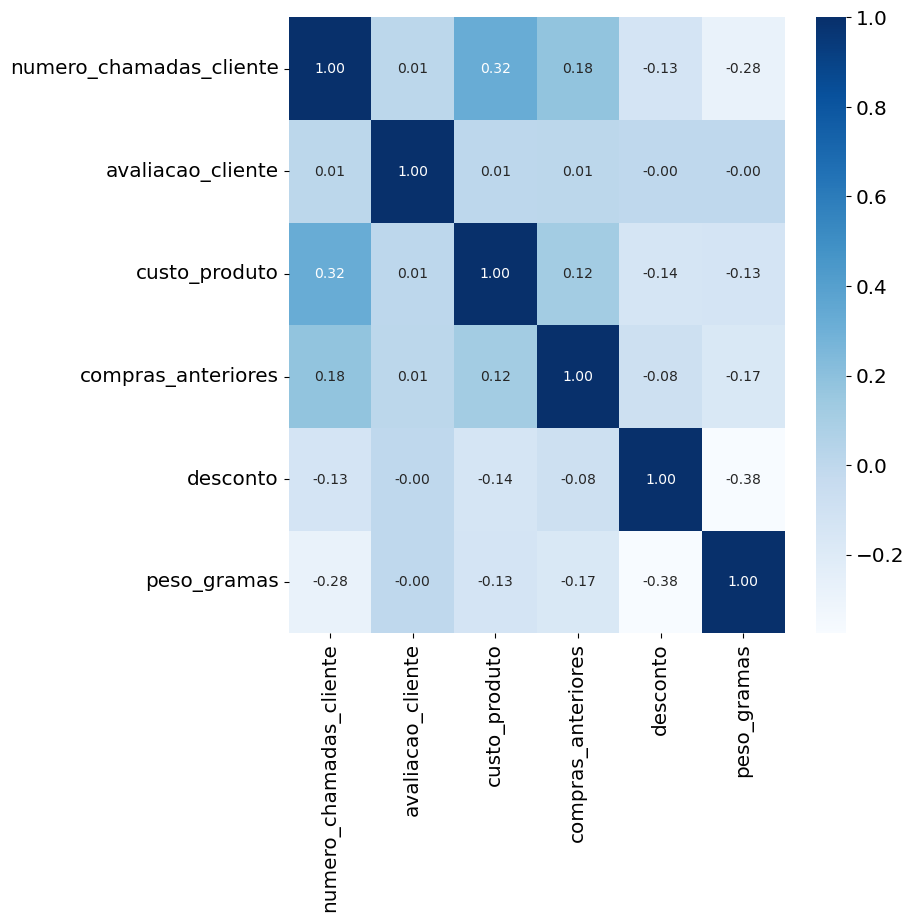

In [68]:
plt.figure(figsize = (8, 8))
sns.heatmap(corr_df, cmap = 'Blues', annot = True, fmt = '.2f')

A partir do *mapa de correlação* acima, pode-se ver que:

* Há uma correlação positiva entre `numero_chamadas_cliente` e `custo_produto`.
* Há uma correlação positiva entre `numero_chamadas_cliente` e `compras_anteriores`.
* Há uma correlação negativa entre `desconto` e `peso_gramas`.
* E há uma correlação fraca entre as demais variáveis.

Obs: Não usamos correlação para variáveis categóricas. Nesse caso usamos associação.

### Análise Bivariada - Pair Plot

<Figure size 1500x1500 with 0 Axes>

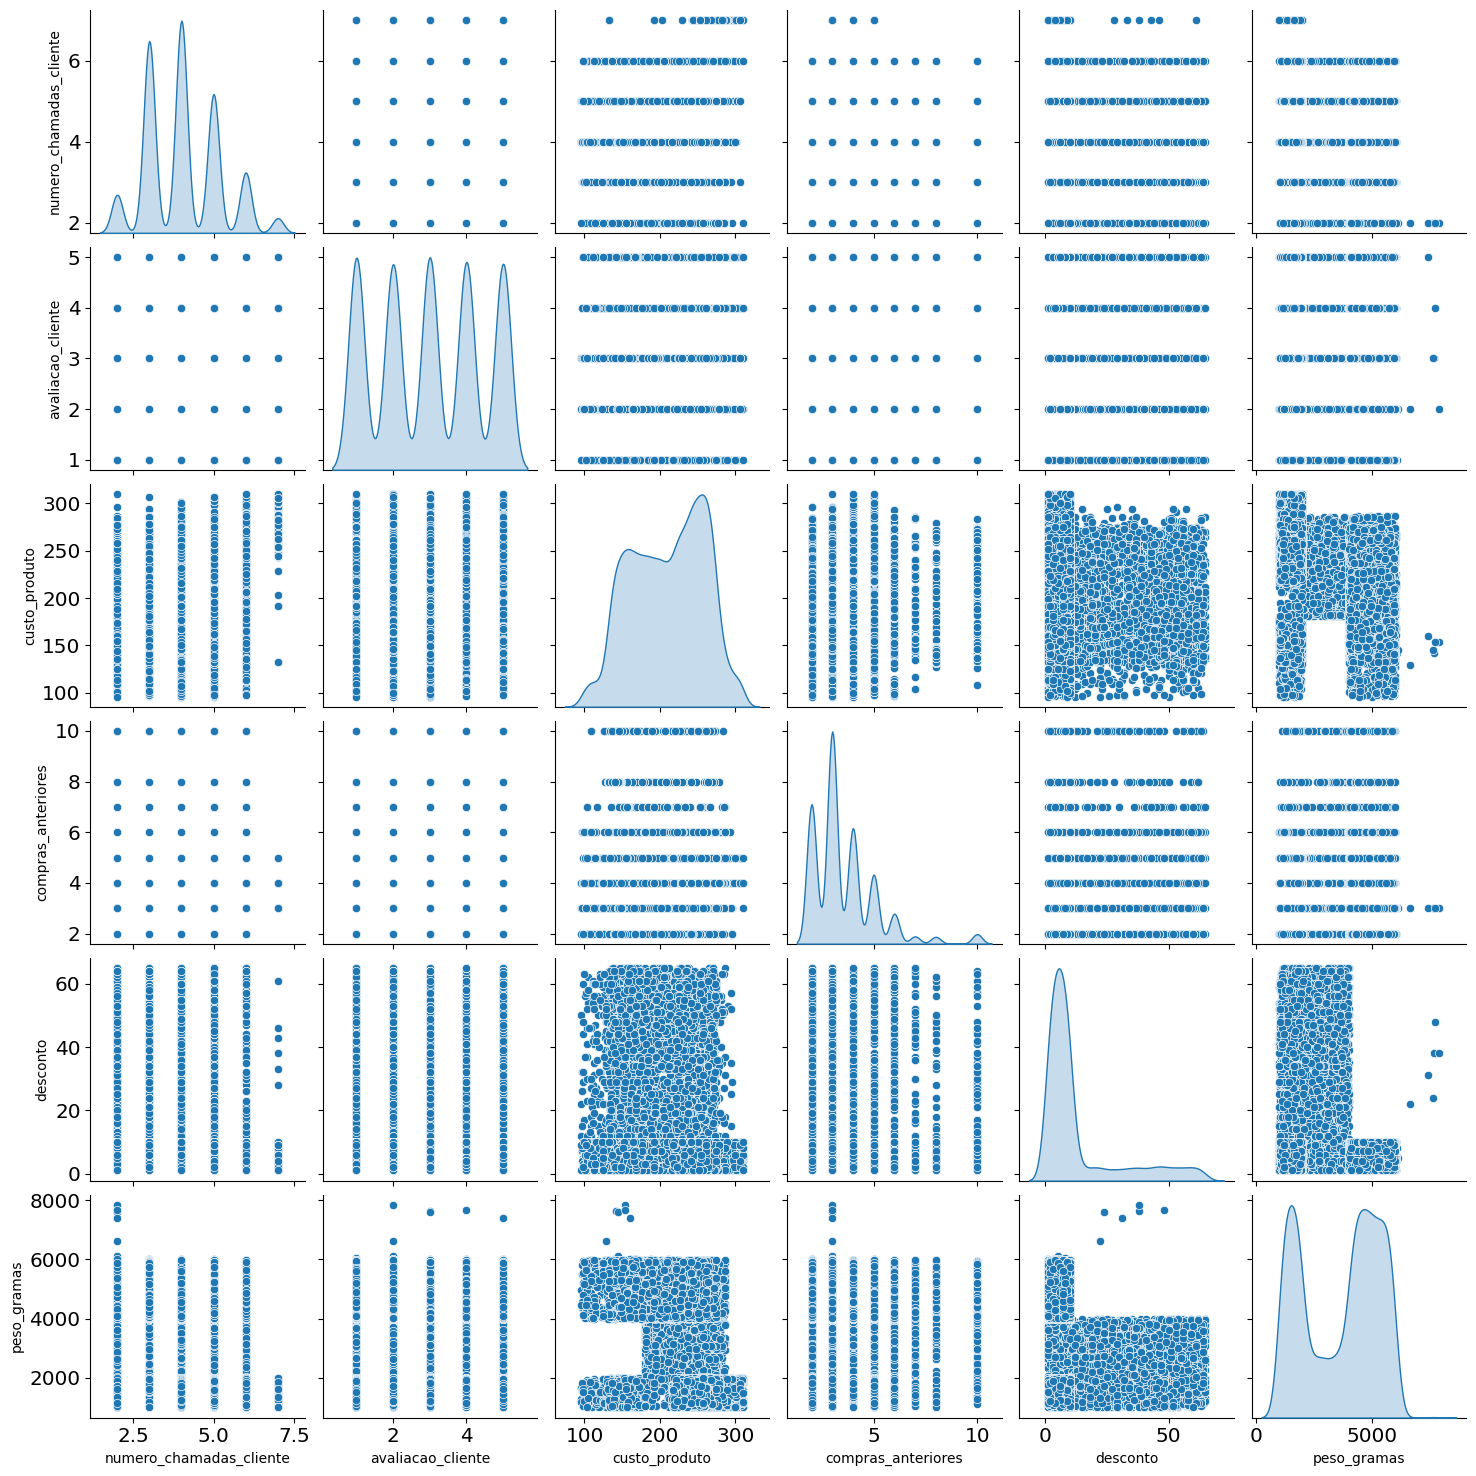

In [69]:
plt.figure(figsize = (15, 15))
sns.pairplot(df[nums], diag_kind = 'kde')

### Colunas Categóricas x Variável Target

In [70]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

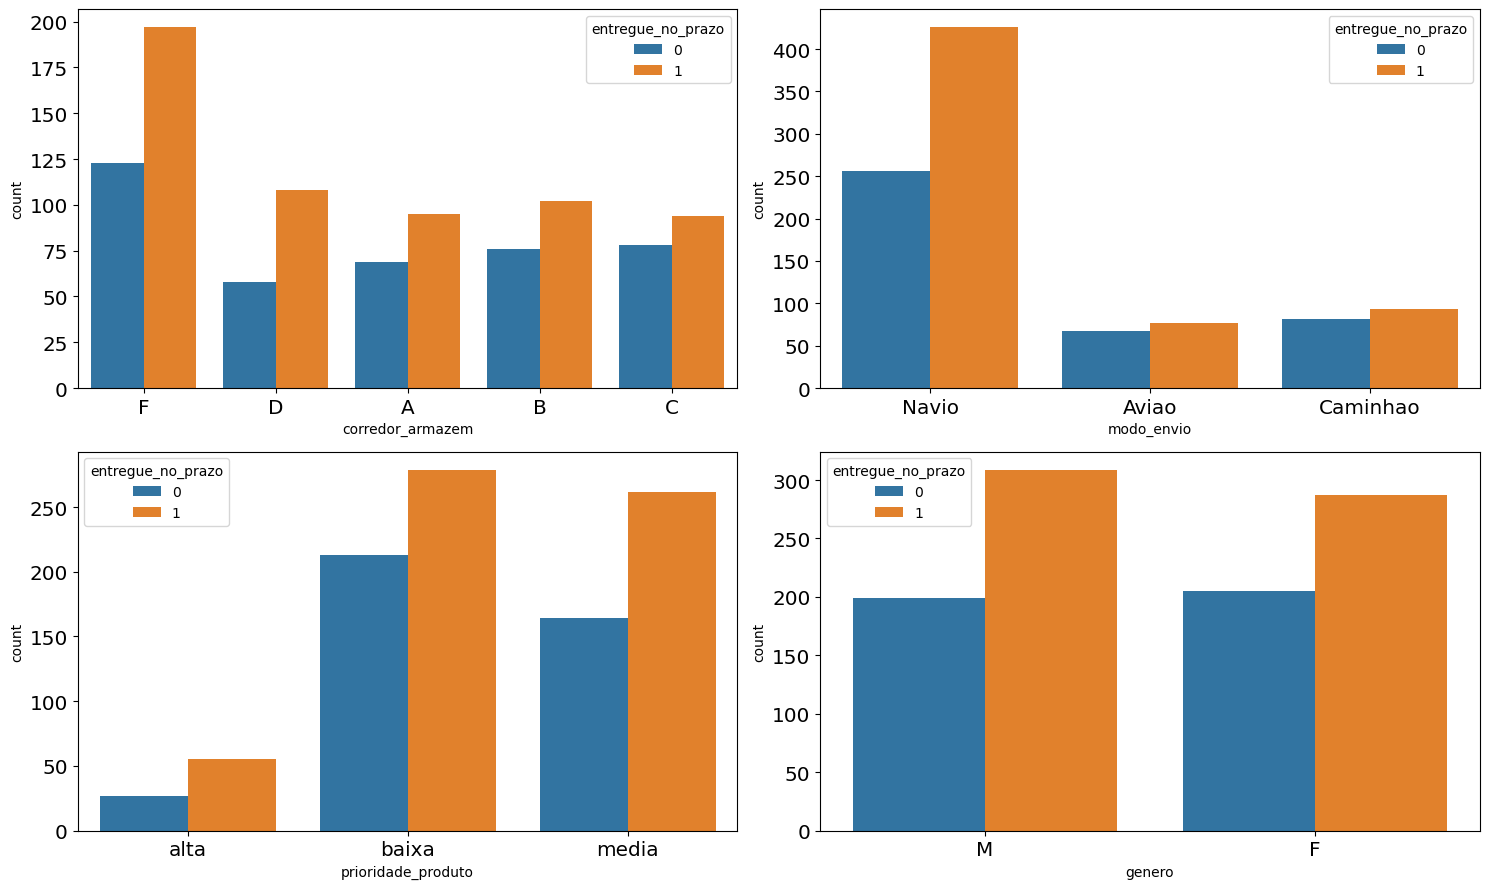

In [72]:
plt.figure(figsize = (15, 9))
for i in range(0, len(cats)):
    plt.subplot(2, 2, i+1) 
    sns.countplot(data = df_sample, x = cats[i], hue = 'entregue_no_prazo')
    plt.tight_layout()

Observações:

* Envio por navio tende a apresentar atraso na entrega.
* Em prioridade_produto as categorias baixa e média tendem a apresentar atrasos na entrega.
* Em corredor_armazem produtos do corredor F tendem a apresentar atraso na entrega.
* Produtos comprados por mulheres tem um volume ligeiramente menor de entregas feitas no prazo.

## Conclusão da Parte 1 da EDA:

Algumas das coisas que encontramos neste conjunto de dados são:

* Os dados parecem válidos e não há defeitos maiores/significativos.

* Existem algumas distribuições que são um pouco *assimétricas*, isso deve ser lembrado se usarmos modelos que exijam a suposição de uma distribuição normal.

* Não detectamos problemas de multicolinearidade.

* Alguns *recursos* parecem completamente não correlacionados.

* Dos recursos categóricos, `modo_envio` , `corredor_armazem` e `importancia_produto` parecem úteis para prever a variável target.

## EDA - Parte 2

### 1- Os atrasos nas entregas estão igualmente distribuídos pelos modos de envio? Há diferenças discrepantes?

In [ ]:
df.columns

In [ ]:
df['modo_envio'].value_counts()

In [ ]:
df_group1 = df.groupby(['entregue_no_prazo', 'modo_envio']).agg({'ID' : 'nunique'}).reset_index()
df_group1

In [ ]:
df_group2 = df.groupby('entregue_no_prazo').agg({'ID' : 'nunique'}).reset_index() 
df_group2

In [ ]:
df_group3 = df_group1.merge(df_group2, on = 'entregue_no_prazo')
df_group3

In [ ]:
df_group4 = df.groupby('modo_envio').agg({'ID' : 'nunique'}).reset_index() 
df_group4

In [ ]:
df_group5 = df_group1.merge(df_group4, on = 'modo_envio')
df_group5

In [ ]:
df_group5['Percentual(%)'] = df_group5['ID_x'] / df_group5['ID_y'] * 100

In [ ]:
df_group5.columns = ['Status de Entrega no Prazo', 
                     'Modo de Envio', 
                     'Total Por Categoria', 
                     'Total Geral', 
                     'Percentual(%)']
df_group5

In [ ]:
df_group5.columns

In [ ]:
# Gráfico 1 - Análise em Valores Absolutos

# Tamanho da figura
plt.figure(figsize = (15,10))

# Chart
chart = sns.countplot(data = df, 
                      x = 'modo_envio', 
                      hue = 'entregue_no_prazo',
                      palette = ["red","green"])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nModo de Envio", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)

# Legenda
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')

# Adicionado Título 
chart.text(x = -0.5, 
           y = 5200, 
           s = "Entregas com Base no Modo de Envio (Absoluto)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Adicionado Sub-Título
chart.text(x = -0.5, 
           y = 4900,
           s = 'Há atrasos em todos os modos de envio, mas usar Navio parece ser o modo que mais gera atrasos.',
           fontsize = 16, 
           alpha = .85);

In [ ]:
df_group5.columns

In [ ]:
# Gráfico 2 - Análise em Valores Percentuais

# Tamanho da figura
plt.figure(figsize = (15,10))

# Chart
chart = sns.barplot(x = 'Modo de Envio', 
                    y = 'Percentual(%)', 
                    data = df_group5, 
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red","green"])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nModo de Envio", fontsize = 14)
chart.set_ylabel("Percentual (%)", fontsize = 14)

# Legenda
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')

# Título
chart.text(x = -0.5, 
           y = 70, 
           s = "Entregas com Base no Modo de Envio (Percentual)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Sub-título
chart.text(x = -0.5, 
           y = 64,
           s = 'Todos os modos de envio apresentam uma proporção semelhante de envios dentro do prazo e atrasados, \napesar dos volumes variados de envios.',
           fontsize = 16, 
           alpha = .85);

### 2- Há diferença significativa no atraso das entregas quando o produto tem prioridade baixa ou média?

In [ ]:
df.columns

In [ ]:
df_group11 = df.groupby(['entregue_no_prazo','prioridade_produto']).agg({'ID' : 'nunique'}).reset_index()
df_group11

In [ ]:
df_group12 = df.groupby('entregue_no_prazo').agg({'ID' : 'nunique'}).reset_index() 
df_group12

In [ ]:
df_group13 = df_group11.merge(df_group12, on = 'entregue_no_prazo')
df_group13

In [ ]:
df_group14 = df.groupby('prioridade_produto').agg({'ID' : 'nunique'}).reset_index() 
df_group14

In [ ]:
df_group15 = df_group11.merge(df_group14, on = 'prioridade_produto')
df_group15

In [ ]:
df_group13['Percentual(%)'] = df_group13['ID_x'] / df_group13['ID_y'] * 100
df_group13.columns = ['Status de Entrega no Prazo', 
                      'Prioridade do Produto', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_group13

In [ ]:
df_group15['Percentual(%)'] = df_group15['ID_x'] / df_group15['ID_y'] * 100
df_group15.columns = ['Status de Entrega no Prazo', 
                      'Prioridade do Produto', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_group15

In [ ]:
df.columns

In [ ]:
# Gráfico 1 - Análise em Valores Absolutos
plt.figure(figsize = (15,10))
chart = sns.countplot(data = df, 
                      x = 'prioridade_produto', 
                      hue = 'entregue_no_prazo',
                      palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Prioridade do Produto", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 3700, 
           s = "Entregas com Base na Prioridade do Produto (Absoluto)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 3400,
           s = 'Produtos com baixa e média prioridade tem maior número de atrasos pois o volume de entregas é maior.',
           fontsize = 16, 
           alpha = .85);

In [ ]:
df_group15.columns

In [ ]:
# Gráfico 2 - Análise em Valores Percentuais
plt.figure(figsize = (15,10))
chart = sns.barplot(x = 'Prioridade do Produto', 
                    y = 'Percentual(%)', 
                    data = df_group15, 
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nPrioridade do Produto", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 12, 
           title = 'Status :')
chart.text(x = -0.5, 
           y = 74, 
           s = "Entregas com Base na Prioridade do Produto (Percentual)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 69,
           s = 'Produtos de alta prioridade apresentam uma diferença maior entre atraso e pontualidade em comparação com \nmédia e baixa prioridade. Entregas no prazo tem proporção quase similar entre as 3 categorias.',
           fontsize = 16, 
           alpha = .85);

### 3- Quais corredores armazenam produtos com maior proporção de entregas com atraso?

In [ ]:
df.columns

In [ ]:
df_group21 = df.groupby(['entregue_no_prazo','corredor_armazem']).agg({'ID' : 'nunique'}).reset_index()
df_group21

In [ ]:
df_group22 = df.groupby('entregue_no_prazo').agg({'ID' : 'nunique'}).reset_index() 
df_group22

In [ ]:
df_group23 = df_group21.merge(df_group22, on = 'entregue_no_prazo')
df_group23

In [ ]:
df_group23['Percentual(%)'] = df_group23['ID_x'] / df_group23['ID_y'] * 100
df_group23.columns = ['Status de Entrega no Prazo', 
                      'Corredor do Armazem', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_group23

In [ ]:
df_group24 = df.groupby('corredor_armazem').agg({'ID' : 'nunique'}).reset_index() 
df_group24

In [ ]:
df_group25 = df_group21.merge(df_group24, on = 'corredor_armazem')
df_group25

In [ ]:
df_group25['Percentual(%)'] = df_group25['ID_x'] / df_group25['ID_y'] * 100
df_group25.columns = ['Status de Entrega no Prazo', 
                      'Corredor do Armazem', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_group25

In [ ]:
# Gráfico 1 - Análise em Valores Absolutos
plt.figure(figsize = (15,10))
chart = sns.countplot(data = df, 
                      x = 'corredor_armazem', 
                      hue = 'entregue_no_prazo', 
                      palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Corredor do Armazém", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 2600, 
           s = "Entregas com Base no Corredor do Armazém (Absoluto)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 2400,
           s = 'Produtos do corredor F são os que mais tem entregas com atraso com base no volume.',
           fontsize = 16, 
           alpha = .85);

In [ ]:
df_group25.columns

In [ ]:
# Gráfico 2 - Análise em Valores Percentuais
plt.figure(figsize = (15,10))
chart = sns.barplot(x = 'Corredor do Armazem', 
                    y = 'Percentual(%)', 
                    data = df_group25, 
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Corredor do Armazém", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)
plt.legend(loc = 'upper left', 
           borderpad = 0.8, 
           labelspacing = 0.8, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 68, 
           s = "Entregas com Base no Corredor do Armazém (Percentual)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 65,
           s = 'A proporção de atrasos é similar para produtos de todos os corredores, mas produtos do corredor A apresentam a maior taxa de atrasos.',
           fontsize = 16, 
           alpha = .85);

### Desafio Ninja:

### Como a densidade da variável que representa desconto influencia o status de entrega dos produtos?

Responda com apenas um gráfico em uma única linha de código!

In [ ]:
# Resposta com apenas uma linha de código
sns.kdeplot(data = df, x = 'desconto', hue = 'entregue_no_prazo');

In [ ]:
# Resposta com gráfico formatado
plt.figure(figsize = (15,8))
chart = sns.kdeplot(data = df, 
                    x = 'desconto',
                    hue = 'entregue_no_prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('white')
sns.set_palette('prism')
chart.set_xlabel("Desconto", fontsize = 14)
chart.set_ylabel("Densidade", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 13, 
           title = 'Status:', 
           labels = ['No Prazo', 'Atraso'])
chart.text(x = -0.5, 
           y = 0.047, 
           s = "Entregas com Base no Desconto",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 0.045,
           s = 'Os pacotes tendem a chegar no prazo em entregas com baixos descontos oferecidos.',
           fontsize = 16, 
           alpha = .85);

# Fim